In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

Dataset downloaded from: https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

In [141]:
df = pd.read_csv('sentiment_data/all-data.csv', encoding='latin-1', header=None, names=['sentiment', 'headline'])

In [142]:
df

,sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<AxesSubplot:xlabel='sentiment', ylabel='count'>

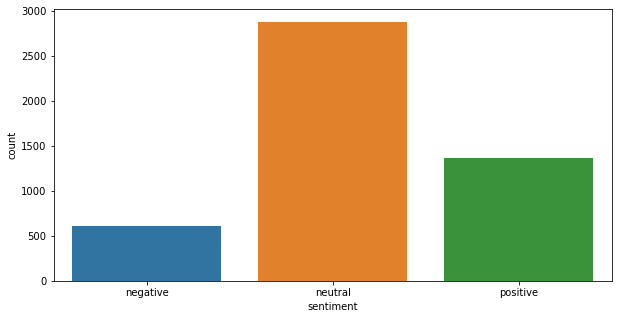

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.sentiment)

In [122]:
def preprocess(df):
    
    # remove all punctuations from headline
    df['processed'] = df.headline.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    
    # remove single characters from headline
    df.processed = df.processed.apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
    
    # remove double spaces, convert to lower case
    df.processed = df.processed.apply(lambda x: re.sub(' +', ' ', x).lower())
    
    # encode sentiment
    df.sentiment = df.sentiment.apply(lambda x: 0 if x == 'negative' else (1 if x == 'neutral' else 2))
    
    return df

In [123]:
preprocess(df)

,sentiment,headline,processed
0,1,"According to Gran , the company has no plans t...",according to gran the company has no plans to ...
1,1,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...,the international electronic industry company ...
3,2,With the new production plant the company woul...,with the new production plant the company woul...
4,2,According to the company 's updated strategy f...,according to the company updated strategy for ...
...,...,...,...
4841,0,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share prices ended lower in...
4842,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...,rinkuskiai beer sales fell by 65 per cent to 4...
4843,0,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell to eur 354 mn from eur 6...
4844,0,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...


Assume that numbers are meaningless because the sentiment analysis is incapable of directional awareness (price falling by 10% vs. price increasing by 10%)

In [124]:
X = df.processed
y = df.sentiment

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

CountVectorizer: performs tokenization, removing stop words, and other basic NLP

TfidfTransformer: performs tfidf calculations

GaussianNB: using Gaussian Naive Bayes because we have more than 2 classifications (positive, negative, neutral). If only two classifications, multinomial Naive Bayes would be better.

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB

In [129]:
# tokenize, remove stop words and create matrix
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(vectorizer.vocabulary_)
X_train_vec = X_train_vec.todense() # convert sparse matrix to dense matrix

{'analyzed': 1636, 'kaupthing': 5336, 'bank': 1940, 'sweden': 8858, 'business': 2276, 'fits': 4179, 'alandsbanken': 1557, 'said': 7997, 'chief': 2508, 'executive': 3927, 'peter': 6956, 'wiklof': 9791, 'statement': 8622, 'electronic': 3527, 'versions': 9568, 'require': 7751, '2448': 599, 'hours': 4792, 'copy': 2883, 'customized': 2999, 'client': 2576, 'digital': 3218, 'controls': 2856, 'custom': 2995, 'watermarks': 9719, 'alexandria': 1568, 'va': 9490, 'june': 5261, 'michael': 6101, 'williams': 9792, 'newbury': 6403, 'park': 6812, 'calif': 2311, 'developed': 3183, 'network': 6394, 'device': 3189, 'finnish': 4153, 'waste': 9707, 'management': 5880, 'cleaning': 2567, 'group': 4532, 'lassila': 5530, 'tikanoja': 9118, 'oyj': 6758, 'lt': 5791, 'net': 6385, 'profit': 7292, 'went': 9765, '322': 750, 'mln': 6172, 'euro': 3861, '477': 952, '2007': 495, '353': 792, '523': 1011, '2006': 488, 'cost': 2904, 'savings': 8068, 'rise': 7866, '20': 472, 'eur': 3720, 'year': 9904, 'oko': 6588, 'beverage':

In [164]:
matrix = vectorizer.fit_transform(df[df['sentiment']=='negative']['headline'])
freqs = zip(vectorizer.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for negative headlines:")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for negative headlines:
[('eur', 325), ('mn', 224), ('profit', 156), ('net', 104), ('finnish', 102), ('company', 100), ('year', 100), ('sales', 98), ('operating', 97), ('period', 90), ('quarter', 89), ('2008', 87), ('2009', 86), ('million', 78), ('said', 77), ('loss', 69), ('2007', 68), ('compared', 68), ('decreased', 68), ('mln', 68)]


In [165]:
matrix = vectorizer.fit_transform(df[df['sentiment']=='positive']['headline'])
freqs = zip(vectorizer.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for positive headlines:")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for positive headlines:
[('eur', 450), ('company', 241), ('mn', 241), ('said', 230), ('year', 212), ('finnish', 202), ('net', 196), ('profit', 192), ('sales', 192), ('million', 170), ('period', 139), ('mln', 128), ('operating', 122), ('2010', 116), ('quarter', 114), ('2009', 109), ('group', 97), ('oyj', 97), ('rose', 94), ('increased', 89)]


In [166]:
matrix = vectorizer.fit_transform(df[df['sentiment']=='neutral']['headline'])
freqs = zip(vectorizer.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for neutral headlines:")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for neutral headlines:
[('company', 510), ('eur', 243), ('said', 238), ('finland', 228), ('finnish', 220), ('business', 195), ('million', 192), ('group', 190), ('new', 189), ('sales', 165), ('shares', 163), ('services', 151), ('share', 142), ('market', 136), ('000', 134), ('2008', 125), ('2007', 113), ('net', 113), ('2009', 107), ('2010', 102)]


In [132]:
# apply tfidf - penalizing high frequency words via L2 normalization
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_vec)
X_test_tfidf = tfidf.transform(X_test_vec)
print(X_train_tfidf)
X_train_tfidf = X_train_tfidf.todense()
X_test_tfidf = X_test_tfidf.todense()

  (0, 9791)	0.3067178477169404
  (0, 8858)	0.1993750079580578
  (0, 8622)	0.24304053182867003
  (0, 7997)	0.11299346479161586
  (0, 6956)	0.28208409930840234
  (0, 5336)	0.24304053182867003
  (0, 4179)	0.3067178477169404
  (0, 3927)	0.2214990795868876
  (0, 2508)	0.22315235380230813
  (0, 2276)	0.1420042759967518
  (0, 1940)	0.17388485698523198
  (0, 1636)	0.3067178477169404
  (0, 1557)	0.5641681986168047
  (1, 9719)	0.3169893294286547
  (1, 9568)	0.2915306368632876
  (1, 7751)	0.3169893294286547
  (1, 4792)	0.28333476846739597
  (1, 3527)	0.24298369543390055
  (1, 3218)	0.23430134138929723
  (1, 2999)	0.3169893294286547
  (1, 2995)	0.28333476846739597
  (1, 2883)	0.30209694896052647
  (1, 2856)	0.2660719442979205
  (1, 2576)	0.2766382563951594
  (1, 599)	0.3169893294286547
  :	:
  (4116, 6087)	0.30400314717805166
  (4116, 4674)	0.4352665577904806
  (4116, 3492)	0.3408645477829291
  (4116, 1460)	0.38905457668070637
  (4117, 9062)	0.3459233863203032
  (4117, 5905)	0.3066651006668001
  (

In [133]:
nb_model = GaussianNB()
nb_model.fit(X_train_tfidf, y_train)

GaussianNB()

In [134]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [136]:
preds = nb_model.predict(X_test_tfidf)

In [137]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.36      0.43      0.39        82
           1       0.67      0.62      0.64       415
           2       0.42      0.45      0.43       230

    accuracy                           0.54       727
   macro avg       0.48      0.50      0.49       727
weighted avg       0.56      0.54      0.55       727



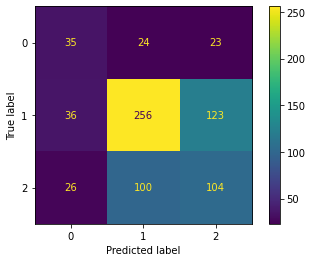

In [138]:
plot_confusion_matrix(nb_model, X_test_tfidf, y_test)

**Recall:**

0 - corresponds to negative sentiment

1 - corresponds with neutral sentiment

2 - corresponds with positive sentiment

Given that the dataset has substantially more labeled data for neutral sentiment headlines (see countplot above), it is not surprising that neutral sentiment has the highest precision and recall scores. For a more balanced dataset, one would expect higher overall accuracy in the test data.

Let's explore what happens if we were to classify between positive or negative sentiments only.

## Filter Out Neutral Sentiment Data

In [146]:
pos_neg = df[df.sentiment != 'neutral']

In [147]:
pos_neg

,sentiment,headline
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
4840,negative,HELSINKI Thomson Financial - Shares in Cargote...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


<AxesSubplot:xlabel='sentiment', ylabel='count'>

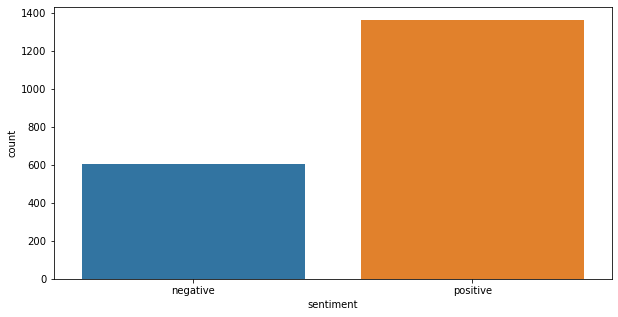

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(x=pos_neg.sentiment)

In [150]:
preprocess(pos_neg)
pos_neg

<ipython-input-122-c997deeff520>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df.headline.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
/Users/danki/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,sentiment,headline,processed
2,0,The international electronic industry company ...,the international electronic industry company ...
3,2,With the new production plant the company woul...,with the new production plant the company woul...
4,2,According to the company 's updated strategy f...,according to the company updated strategy for ...
5,2,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp growth aspocomp is aggre...
6,2,"For the last quarter of 2010 , Componenta 's n...",for the last quarter of 2010 componenta net sa...
...,...,...,...
4840,0,HELSINKI Thomson Financial - Shares in Cargote...,helsinki thomson financial shares in cargotec ...
4841,0,LONDON MarketWatch -- Share prices ended lower...,london marketwatch share prices ended lower in...
4843,0,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell to eur 354 mn from eur 6...
4844,0,Net sales of the Paper segment decreased to EU...,net sales of the paper segment decreased to eu...


In [152]:
X = pos_neg.processed
y = pos_neg.sentiment

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [154]:
# tokenize, remove stop words and create matrix
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print(vectorizer.vocabulary_)
X_train_vec = X_train_vec.todense() # convert sparse matrix to dense matrix

{'transaction': 5063, 'doubles': 1908, 'tecnomens': 4933, 'workforse': 5355, 'adds': 933, 'fourth': 2414, 'net': 3504, 'sales': 4364, 'kone': 3003, 'said': 4355, 'court': 1700, 'papers': 3745, 'union': 5149, 'action': 908, 'delayed': 1797, 'repairs': 4225, 'elevators': 1991, 'federal': 2298, 'courthouse': 1701, 'jan': 2881, '21': 347, 'saltonstall': 4369, 'state': 4711, 'office': 3615, 'building': 1329, '23': 367, 'ruukki': 4344, 'group': 2557, 'calculates': 1351, 'lost': 3186, 'eur': 2081, '4mn': 630, 'failed': 2274, 'project': 4009, 'neste': 3503, 'oil': 3624, 'board': 1259, 'proposed': 4024, '100': 60, 'dividend': 1881, 'fullyear': 2447, '2007': 323, 'compared': 1561, '090': 56, 'year': 5380, 'ago': 972, 'end': 2019, 'march': 3273, 'order': 3678, 'book': 1270, '396': 548, 'mn': 3409, '42': 572, 'corresponding': 1686, 'period': 3808, '2006': 317, 'significant': 4552, 'milestone': 3380, 'benefon': 1212, 'helping': 2634, 'secure': 4445, 'critical': 1719, 'usp': 5194, 'personal': 3815, 

In [155]:
# apply tfidf - penalizing high frequency words via L2 normalization
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_vec)
X_test_tfidf = tfidf.transform(X_test_vec)
print(X_train_tfidf)
X_train_tfidf = X_train_tfidf.todense()
X_test_tfidf = X_test_tfidf.todense()

  (0, 5355)	0.4382456740987729
  (0, 5063)	0.3366453934118087
  (0, 4933)	0.4382456740987729
  (0, 4364)	0.16845327332317825
  (0, 3504)	0.16821042842818681
  (0, 2414)	0.3076794369605902
  (0, 1908)	0.4382456740987729
  (0, 933)	0.39894132029920343
  (1, 5149)	0.20791720682076154
  (1, 4711)	0.22755090527162253
  (1, 4369)	0.2581575470979247
  (1, 4355)	0.09493218687052546
  (1, 4225)	0.2581575470979247
  (1, 3745)	0.2350045163508854
  (1, 3615)	0.20439787452458322
  (1, 3003)	0.19563418327327786
  (1, 2881)	0.42370297120769224
  (1, 2298)	0.22755090527162253
  (1, 1991)	0.20791720682076154
  (1, 1797)	0.24461389233286276
  (1, 1701)	0.2581575470979247
  (1, 1700)	0.22755090527162253
  (1, 1329)	0.18295818151501048
  (1, 908)	0.24461389233286276
  (1, 367)	0.1908542197595213
  :	:
  (1669, 2897)	0.3669912518770878
  (1669, 2220)	0.4031478324847466
  (1669, 1744)	0.3378000585587219
  (1669, 332)	0.19179490026650875
  (1669, 328)	0.1755558699828049
  (1670, 5144)	0.251426398926867
  (16

In [156]:
nb_model = GaussianNB()
nb_model.fit(X_train_tfidf, y_train)

GaussianNB()

In [157]:
preds = nb_model.predict(X_test_tfidf)

In [158]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49        92
           2       0.77      0.74      0.75       204

    accuracy                           0.67       296
   macro avg       0.62      0.63      0.62       296
weighted avg       0.68      0.67      0.67       296



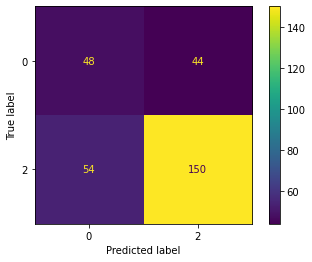

In [159]:
plot_confusion_matrix(nb_model, X_test_tfidf, y_test)

Note that, again, data is skewed due to substantially more positive sentiment data than negative sentiment data.
However, removing neutral sentiment data, accuracy score has increased from 54% to 67%.

**This model would not be suitable for production - one would need a more balanced dataset to train the Naive Bayes model to perform a less biased analysis. For one to be able to reliable make trades based on sentiment, an accuracy score of at least 90% would be preferred. Nonetheless, it is interesting to note that an overall accuracy score of 67% can be achieved based on just news headlines.**